In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score

In [4]:
train_data = pd.read_csv('archive/data01.csv')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
group                       1177 non-null int64
ID                          1177 non-null int64
outcome                     1176 non-null float64
age                         1177 non-null int64
gendera                     1177 non-null int64
BMI                         962 non-null float64
hypertensive                1177 non-null int64
atrialfibrillation          1177 non-null int64
CHD with no MI              1177 non-null int64
diabetes                    1177 non-null int64
deficiencyanemias           1177 non-null int64
depression                  1177 non-null int64
Hyperlipemia                1177 non-null int64
Renal failure               1177 non-null int64
COPD                        1177 non-null int64
heart rate                  1164 non-null float64
Systolic blood pressure     1161 non-null float64
Diastolic blood pressure    1161 non-null float64
Respiratory rate    

In [6]:
train_data["BMI"].fillna(train_data["BMI"].mean(), inplace=True)
train_data["heart rate"].fillna(train_data["heart rate"].mean(), inplace=True)
train_data["Systolic blood pressure"].fillna(train_data["Systolic blood pressure"].mean(), inplace=True)
train_data["Diastolic blood pressure"].fillna(train_data["Diastolic blood pressure"].mean(), inplace=True)
train_data["Respiratory rate"].fillna(train_data["Respiratory rate"].mean(), inplace=True)
train_data["temperature"].fillna(train_data["temperature"].mean(), inplace=True)
train_data["SP O2"].fillna(train_data["SP O2"].mean(), inplace=True)
train_data["Urine output"].fillna(train_data["Urine output"].mode()[0], inplace=True)
train_data["Neutrophils"].fillna(train_data["Neutrophils"].mean(), inplace=True)
train_data["Basophils"].fillna(train_data["Basophils"].mean(), inplace=True)
train_data["Lymphocyte"].fillna(train_data["Lymphocyte"].mean(), inplace=True)
train_data["PT"].fillna(train_data["PT"].mean(), inplace=True)
train_data["Creatine kinase"].fillna(train_data["Creatine kinase"].mean(), inplace=True)
train_data["glucose"].fillna(train_data["glucose"].mean(), inplace=True)
train_data["PH"].fillna(train_data["PH"].mean(), inplace=True)
train_data["Lactic acid"].fillna(train_data["Lactic acid"].mean(), inplace=True)
train_data["PCO2"].fillna(train_data["PCO2"].mean(), inplace=True)

In [7]:
train_data = train_data.dropna(how="any")

In [8]:
train_data.drop(["group", "ID"], axis=1, inplace=True)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1176
Data columns (total 49 columns):
outcome                     1155 non-null float64
age                         1155 non-null int64
gendera                     1155 non-null int64
BMI                         1155 non-null float64
hypertensive                1155 non-null int64
atrialfibrillation          1155 non-null int64
CHD with no MI              1155 non-null int64
diabetes                    1155 non-null int64
deficiencyanemias           1155 non-null int64
depression                  1155 non-null int64
Hyperlipemia                1155 non-null int64
Renal failure               1155 non-null int64
COPD                        1155 non-null int64
heart rate                  1155 non-null float64
Systolic blood pressure     1155 non-null float64
Diastolic blood pressure    1155 non-null float64
Respiratory rate            1155 non-null float64
temperature                 1155 non-null float64
SP O2          

In [10]:
# number of attack labels 
train_data['outcome'].value_counts()

0.0    997
1.0    158
Name: outcome, dtype: int64

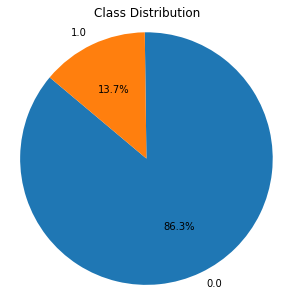

In [11]:
labels = train_data['outcome'].value_counts().index
sizes = train_data['outcome'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Class Distribution')
plt.show()

Text(0.5, 1, 'Correlation Matrix')

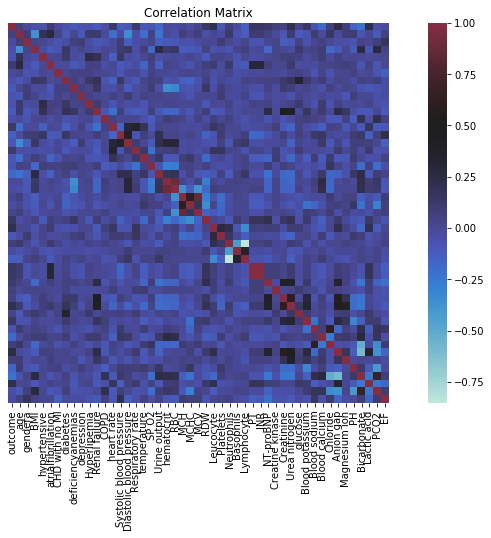

In [12]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(train_data.corr(), square=True, center=0.5, yticklabels=False).set_title('Correlation Matrix')

In [165]:
X = train_data.drop(["outcome"],axis =1)
y = train_data["outcome"]

In [174]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

selector = SelectPercentile(mutual_info_classif, percentile=35)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape


(1155, 17)

In [176]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
#selected_columns

In [62]:
df = train_data[['gendera',
 'deficiencyanemias',
 'depression',
 'COPD',
 'heart rate',
 'temperature',
 'Urine output',
 'Leucocyte',
 'Lymphocyte',
 'PT',
 'Urea nitrogen',
 'Blood sodium',
 'Anion gap',
 'PH',
 'Bicarbonate',
 'Lactic acid',
 'PCO2',
                  'outcome']]
df.to_csv('processed.csv')

# SMOTE Sampling

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
sm = SMOTE(random_state=42)

In [94]:
X_res, y_res = sm.fit_resample(X_reduced,y)

In [161]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

In [142]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [143]:
storeResults('Logistic Regression',lr_acc,lr_prec,lr_rec,lr_f1)

# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [144]:
storeResults('Random FOrest',rf_acc,rf_prec,rf_rec,rf_f1)

# XGBoost

In [100]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

xgb_acc = accuracy_score(y_pred, y_test)
xgb_prec = precision_score(y_pred, y_test,average='weighted')
xgb_rec = recall_score(y_pred, y_test,average='weighted')
xgb_f1 = f1_score(y_pred, y_test,average='weighted')

In [145]:
storeResults('XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1)

# Stacking Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10)),('mlp', MLPClassifier(random_state=1, max_iter=30))]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))


clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')


In [155]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# Voting Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()

eclf1 = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [156]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1)

DL

In [113]:
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import SimpleRNN,LSTM,GRU, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [106]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_res)

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y_res, test_size=0.3)

In [108]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
train_X=X_train
val_X=X_test

In [109]:
## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))

In [110]:
## Recuperation des labels
train_y=y_train
val_y=y_test

# RNN

In [111]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [118]:
inputs1=Input((1,17))
att_in=SimpleRNN(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=SimpleRNN(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [119]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [122]:
history=model1.fit(train_X, train_y,epochs=50,batch_size=2, validation_data=(val_X, val_y))

Epoch 1/50
698/698 [==============================] - 1s 2ms/step - loss: 0.5359 - accuracy: 0.7297 - val_loss: 0.5003 - val_accuracy: 0.7579
Epoch 2/50
698/698 [==============================] - 1s 2ms/step - loss: 0.5192 - accuracy: 0.7477 - val_loss: 0.4886 - val_accuracy: 0.7696
Epoch 3/50
698/698 [==============================] - 1s 2ms/step - loss: 0.5303 - accuracy: 0.7305 - val_loss: 0.4845 - val_accuracy: 0.7730
Epoch 4/50
698/698 [==============================] - 2s 3ms/step - loss: 0.5158 - accuracy: 0.7520 - val_loss: 0.4754 - val_accuracy: 0.7763
Epoch 5/50
698/698 [==============================] - 2s 4ms/step - loss: 0.5220 - accuracy: 0.7319 - val_loss: 0.4744 - val_accuracy: 0.7730
Epoch 6/50
698/698 [==============================] - 3s 4ms/step - loss: 0.5127 - accuracy: 0.7556 - val_loss: 0.4758 - val_accuracy: 0.7713
Epoch 7/50
698/698 [==============================] - 2s 3ms/step - loss: 0.5031 - accuracy: 0.7606 - val_loss: 0.4565 - val_accuracy: 0.7830
Epoch 

In [123]:
# evaluate the model
_, train_acc = model1.evaluate(train_X, train_y, verbose=0)
_, test_acc = model1.evaluate(val_X, val_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.895, Test: 0.808


In [124]:
y_pred = model1.predict(val_X, verbose=1)
y_pred = np.argmax(y_pred,axis=1)
rnn_acc = accuracy_score(y_pred, val_y)
rnn_prec = precision_score(y_pred, val_y,average='weighted')
rnn_rec = recall_score(y_pred, val_y,average='weighted')
rnn_f1 = f1_score(y_pred, val_y,average='weighted')

19/19 [==============================] - 1s 1ms/step


In [146]:
storeResults('RNN',rnn_acc,rnn_prec,rnn_rec,rnn_f1)

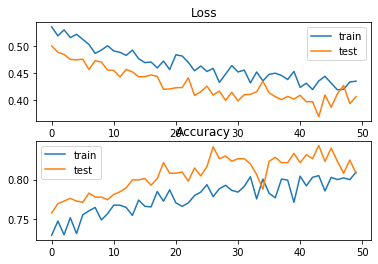

In [126]:
# plot loss during training
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# LSTM - AE

In [127]:
from sklearn.preprocessing import MinMaxScaler
import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed

import tensorflow as tf

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [128]:
from sklearn.model_selection import train_test_split
x_train1, x_test1 = train_test_split(X_res, test_size = 0.2, random_state = 0)

y_train1, y_test1 = train_test_split(y_res, test_size = 0.2, random_state = 0)

In [129]:
# normalize the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train1)
x_test = scaler.transform(x_test1)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [130]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train1 = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
print("Training data shape:", X_train1.shape)
X_test1 = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
print("Test data shape:", X_test1.shape)

Training data shape: (1595, 1, 17)
Test data shape: (399, 1, 17)


In [131]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [132]:
# create the autoencoder model
model_tl = autoencoder_model(X_train1)
model_tl.compile(optimizer='adam', loss='mae')
model_tl.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1, 17)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 16)             2176      
_________________________________________________________________
lstm_3 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 4)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 4)              144       
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 17)             289 

In [133]:
nb_epochs = 50
batch_size = 2
history = model_tl.fit(X_train1, X_train1, epochs=nb_epochs, batch_size=batch_size,validation_split=0.05).history

Epoch 1/50
758/758 [==============================] - 15s 5ms/step - loss: 0.2096 - val_loss: 0.1228
Epoch 2/50
758/758 [==============================] - 2s 3ms/step - loss: 0.1237 - val_loss: 0.1206
Epoch 3/50
758/758 [==============================] - 2s 3ms/step - loss: 0.1211 - val_loss: 0.1176
Epoch 4/50
758/758 [==============================] - 2s 3ms/step - loss: 0.1176 - val_loss: 0.1137
Epoch 5/50
758/758 [==============================] - 2s 3ms/step - loss: 0.1096 - val_loss: 0.1047
Epoch 6/50
758/758 [==============================] - 2s 3ms/step - loss: 0.1001 - val_loss: 0.1011
Epoch 7/50
758/758 [==============================] - 3s 4ms/step - loss: 0.0994 - val_loss: 0.1006
Epoch 8/50
758/758 [==============================] - 3s 4ms/step - loss: 0.0998 - val_loss: 0.1013
Epoch 9/50
758/758 [==============================] - 3s 4ms/step - loss: 0.0991 - val_loss: 0.1006
Epoch 10/50
758/758 [==============================] - 3s 4ms/step - loss: 0.0980 - val_loss: 0.100

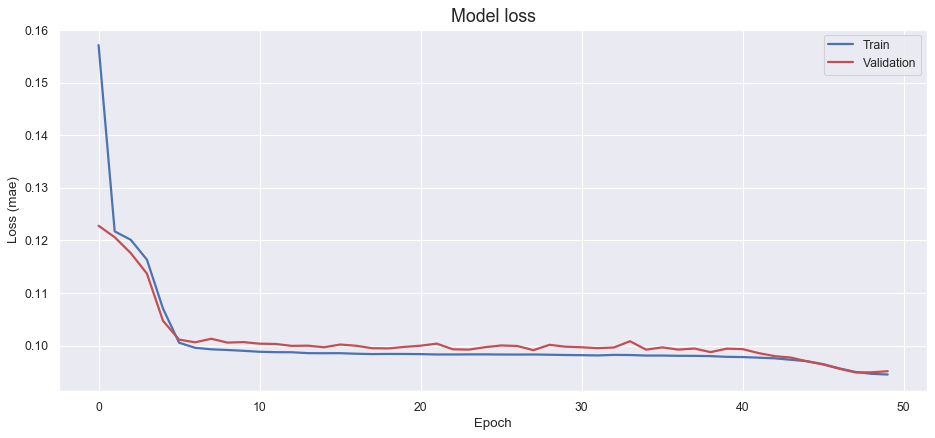

In [134]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [140]:
y_pred=model_tl.predict(X_test1)
y_pred = np.argmax(y_pred,axis=1)

In [141]:
tl_acc = 1 - history['loss'][49]
tl_prec = precision_score(y_pred, y_test1,average='weighted')
tl_rec = recall_score(y_pred, y_test1,average='weighted')
tl_f1 = f1_score(y_pred, y_test1,average='weighted')

In [147]:
storeResults('LSTM-AE',tl_acc,tl_prec,tl_rec,tl_f1)

# Comparison

In [157]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score,
                        
                      })

In [158]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.749,0.749,0.749,0.749
1,Random FOrest,0.920,0.921,0.920,0.920
2,XGBoost,0.920,0.920,0.920,0.920
3,RNN,0.533,1.000,0.533,0.695
4,LSTM-AE,0.906,1.000,0.546,0.707
5,Stacking Classifier,0.875,0.875,0.875,0.875
6,Voting Classifier,1.000,1.000,1.000,1.000


# MOdelling

In [93]:
import joblib

filename1 = 'model.sav'

joblib.dump(eclf1, filename1)

['model.sav']

# Graph

In [150]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

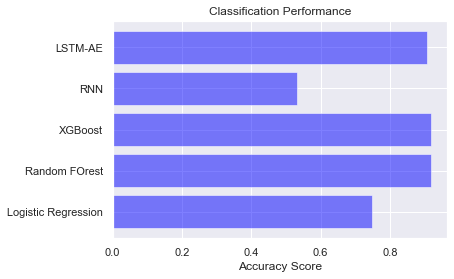

In [151]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

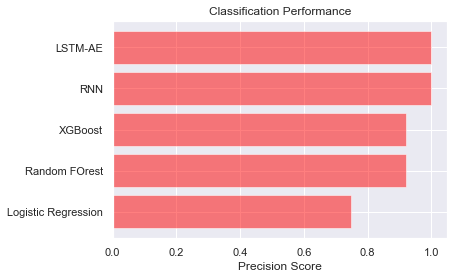

In [152]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

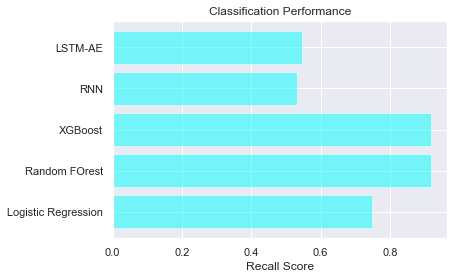

In [153]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

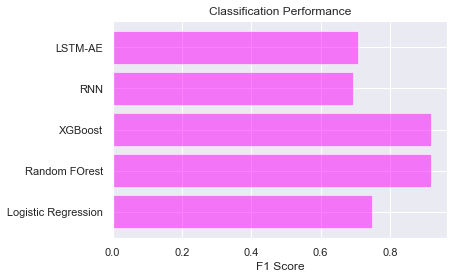

In [154]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()